In [1]:
from tensorflow.keras.models import load_model
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
# Replace 'your_directory_path' with the path to your images folder
directory_path = 'F:/Coding stuff/grpPRJ/demo/'

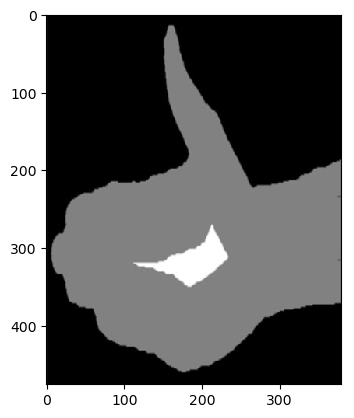

In [5]:
img = cv2.imread(directory_path + 'test/test.jpg')
plt.imshow(img)
plt.show()

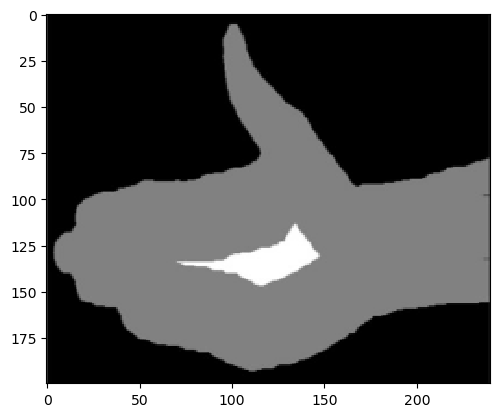

In [6]:
resize = tf.image.resize(img, (200,240))
plt.imshow(resize.numpy().astype(int))
# plt.show()

In [7]:
# Assuming 'image' is your EagerTensor with shape (None, 200, 240, 3)
grayscale_image = tf.image.rgb_to_grayscale(resize)
type(grayscale_image)

tensorflow.python.framework.ops.EagerTensor

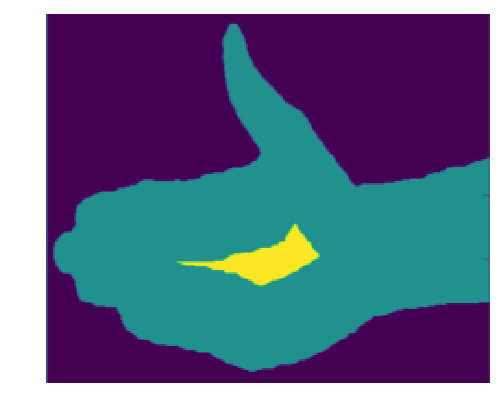

In [8]:
# Assuming your processed image is stored in a variable called 'eager_tensor_image'
# Convert the EagerTensor to a NumPy array
image_array = grayscale_image.numpy()

# Remove the single color channel dimension
image_array = image_array.squeeze()

# Display the image using matplotlib
plt.imshow(image_array)
# plt.imshow(image_array, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()


In [9]:
# F:\Coding stuff\grpPRJ\USTHGroupProject\demo\dataset\HandGesture\images

# List all subdirectories using os.listdir()
labels = [f.name for f in os.scandir(directory_path + 'dataset/HandGesture/images') if f.is_dir()]

# Print the list of subfolder names
print(labels)
print(len(labels))

['okay', 'paper', 'rock', 'rock_on', 'scissor', 'thumbs', 'up']
7


In [10]:
model = tf.keras.models.load_model(directory_path + 'best.h5')

In [11]:
yhat = model.predict(np.expand_dims(grayscale_image, 0))
yhat
max_position = np.argmax(yhat)
print(f'label: {labels[max_position]}')
print(f'Confidence level: {round(yhat[0][max_position]*100, 2)} %')


1/1 [==============================] - 6s 6s/step
label: thumbs
Confidence level: 88.74 %
